## TESS lightcurve using Stingray

##### TESS light curves are FITS format files that contain the output of the photometric extraction and subsequent systematics removal (cotrending) performed by the SPOC algorithms. The flux and respective uncertainties are provided at each cadence, with NaNs filling in any missing data values

In [168]:
from astropy.io import fits
import numpy as np
from stingray import Lightcurve
import matplotlib.pyplot as plt

#### Dataset source : https://exo.mast.stsci.edu/exomast_planet.html?planet=HD100546b

In [153]:
file = "/home/saurav/Desktop/workspace/notebooks/Lightcurve/hlsp_tess-spoc_tess_phot_0000000280773136-s0037_tess_v1_lc.fits"


In [182]:
with fits.open(file) as hdul:
    print(hdul.info())
    img = hdul[2].data
Target = hdul[0].header["OBJECT"]
print(Target)

Filename: /home/saurav/Desktop/workspace/notebooks/Lightcurve/hlsp_tess-spoc_tess_phot_0000000280773136-s0037_tess_v1_lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   3649R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (13, 12)   int32   
None
TIC 280773136


Lets plot the ImageHDU (aperture pixels) 

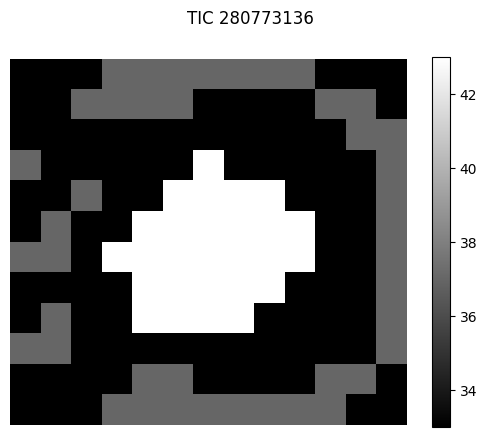

In [183]:
fig, ax = plt.subplots()
cax = ax.imshow(img, cmap=plt.cm.grey, origin="lower")
cbar = fig.colorbar(cax)
fig.suptitle(f"{Target}")
plt.axis("off")
plt.show()

Since the data has NAN in its better to clean the values 

In [184]:
with fits.open(file) as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    sap_fluxes = hdulist[1].data['SAP_FLUX']
    
    
    sap_fluxes_error = hdulist[1].data["SAP_FLUX_ERR"]
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']
    pdcsap_fluxes_error = hdulist[1].data["PDCSAP_FLUX_ERR"]

diff = np.abs(tess_bjds[0] - tess_bjds[1])
nan_mask = np.isnan(tess_bjds)
check = True in nan_mask
print(check)


True


Over here time values has NAN too, to maintain sequnces we cant just replace it with some values is better we add diff to previous not NAN value as shown below

In [ ]:
tess_bjds_clean = tess_bjds.copy()
for i in range(0, len(tess_bjds_clean)):
    if nan_mask[i]:  
        tess_bjds_clean[i] = tess_bjds_clean[i - 1] + diff  

In [146]:
sap_fluxes_corrected = np.nan_to_num(sap_fluxes,nan = np.nanmedian(sap_fluxes))
sap_fluxes_corrected[0:10]
t = np.linspace(0,100,3649)
sap_fluxes_error_corrected = np.nan_to_num(sap_fluxes_error , nan = np.nanmedian(sap_fluxes_error))


<Axes: xlabel='Time (s)', ylabel='counts'>

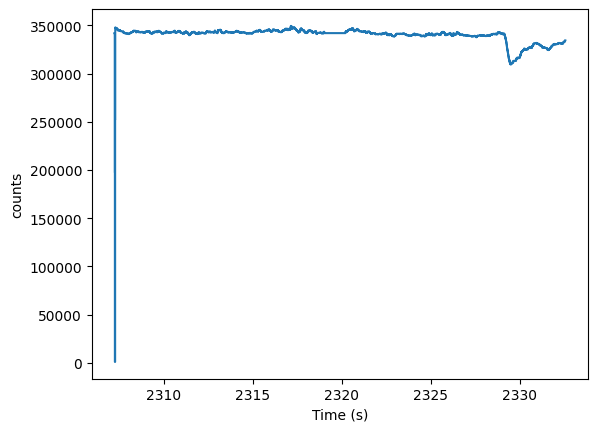

In [149]:

lc = Lightcurve(tess_bjds_clean,sap_fluxes_corrected,err=sap_fluxes_error_corrected)
lc.plot()

In [150]:
pdcsap_fluxes_corrected = np.nan_to_num(pdcsap_fluxes,nan = np.nanmedian(pdcsap_fluxes))
pdcsap_fluxes_error_corrected = np.nan_to_num(pdcsap_fluxes_error , nan = np.nanmedian(pdcsap_fluxes_error))

pdcsap_fluxes_error_corrected
pdcsap_fluxes_corrected



array([353359.56, 353359.56, 353359.56, ..., 367221.88, 367348.25,
       367650.34], dtype='>f4')

<Axes: xlabel='Time (s)', ylabel='counts'>

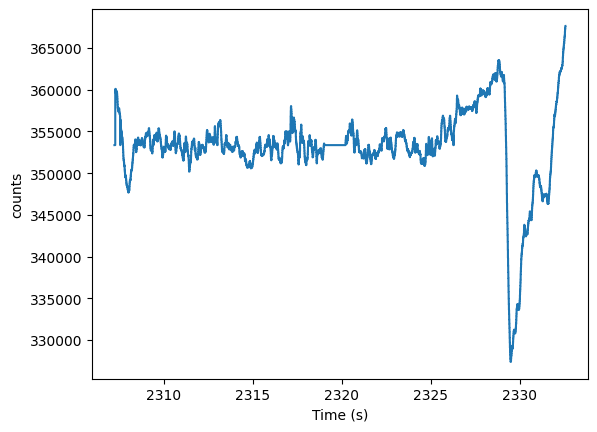

In [151]:
lc2 = Lightcurve(tess_bjds_clean,pdcsap_fluxes_corrected,err = pdcsap_fluxes_error_corrected)
lc2.plot()